# Relación entre vacunación y mortalidad del Covid19

Valeria Quinelli
EAD 2

## Índice
1 - Introducción y planteamiento del problema  
2 - Objetivos  
3 - Hipótesis a contrastar  
4 - Explicación de la base de datos y definición de variables  
5 - Análisis exploratiorio, descriptivo y visual de los datos  
6 - Conclusiones  

## 1 - Introducción y planteamiento del problema

Desde el 2019 debimos aprender a convivir con el Coronavirus, virus que surgió en China y causó la pandemia mundial.
El virus afectó a 608 millones de personas en todo el mundo, dejando aproximadamente 6.5 millones de muertos. 
En este informe se analizará la relación entre la vacunación contra dicho virus y su mortalidad.


## 2 - Objetivos

*2.1* General

Analizar la vacunación en el mundo y su incidencia en la tasa de mortalidad.

*2.2* Específicos

Ver si Uruguay se encuentra en una situación mejor al promedio.
Determinar países con mayor y menor vacunación. 


## 3 - Hipótesis a contrastar

Buscaremos probar la relación entre la vacunación y la mortalidad.  

Plantearemos las siguientes hipótesis:  

H0: Mayor tasa de vacunación implica menor tasa de mortalidad por Covid 19.  
H1: La vacunación no reduce la mortalidad por Covid 19.  

## 4 - Explicación de la base de datos y definición de variables

La base de datos reúne información sobre la vacunación contra el Covid 19 y sus resultados en diferentes países.

Puede accederse a los datos desde este link: 

In [2]:
# Importamos las librerías

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

# Cargamos los datos

df = pd.read_csv('covid-vaccination-vs-death_ratio.csv')
df.head()

,Unnamed: 0,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,New_deaths,population,ratio
0,0,Afghanistan,AFG,2021-05-11,504502.0,448878.0,55624.0,12,40374668.0,1.111781
1,1,Afghanistan,AFG,2021-05-20,547901.0,470341.0,77560.0,10,40374668.0,1.164941
2,2,Afghanistan,AFG,2021-05-24,573277.0,476367.0,96910.0,10,40374668.0,1.179866
3,3,Afghanistan,AFG,2021-05-26,590454.0,479372.0,111082.0,19,40374668.0,1.187309
4,4,Afghanistan,AFG,2021-05-27,593313.0,479574.0,113739.0,14,40374668.0,1.187809


In [3]:
df.shape

(32911, 10)

La base de datos cuenta con 10 columnas y 32911 filas de registros.

#### Descripción de las columnas
* **country** : Nombre del país
* **iso_code** : Código ISO del país
* **date** : Fecha a la que pertenecen los datos
* **total_vaccinations** : Cantidad de vacunas aplicadas
* **people_vaccinated**  : Cantidad de personas que se dieron al menos una vacuna
* **New_deaths** : Cantidad de muertos en el día
* **people_fully_vaccinated** : Cantidad de personas vacunadas totalmente
* **population** : Población del país en 2021
* **ratio**: Porcentaje de personas vacunadas en ese país a la fecha, calculado como people_vaccinated/population * 100 


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32911 entries, 0 to 32910
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               32911 non-null  int64  
 1   country                  32911 non-null  object 
 2   iso_code                 32911 non-null  object 
 3   date                     32911 non-null  object 
 4   total_vaccinations       32911 non-null  float64
 5   people_vaccinated        32911 non-null  float64
 6   people_fully_vaccinated  32911 non-null  float64
 7   New_deaths               32911 non-null  int64  
 8   population               32911 non-null  float64
 9   ratio                    32911 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 2.5+ MB


### Países estudiados

Se incluye información de la vacunación en 197 países.

In [115]:
countries = []
for i in df['country']:
    if i not in countries:
        countries.append(i)
        
len(countries)

197

### Período estudiado

Se estudian datos desde el 13 de diciembre de 2020 hasta el 29 de marzo de 2022.

In [10]:
print(min(df['date']))
print(max(df['date']))

2020-12-13
2022-03-29


#### Procesamiento de datos

Para poder trabajar mejor con los datos, se eliminó la columna sin nombre que contenía un índice para cada registro.

In [116]:
del df['Unnamed: 0']

df.head()

KeyError: 'Unnamed: 0'

## 5 - Análisis exploratiorio, descriptivo y visual de los datos

In [ ]:
Analizaremos la cantidad de personas vacunadas y qué relación tiene con la mortalidad.

In [17]:
#Calculo de poblacion mundial

world_population = []
for i in df['population']:
    if i not in world_population:
        world_population.append(i)
world_population = sum(world_population)

fully_vaccinated_per_country = df.groupby(["country"])["people_fully_vaccinated"].max()
total_completely_vaccinated = sum(fully_vaccinated_per_country)

7627585484.0

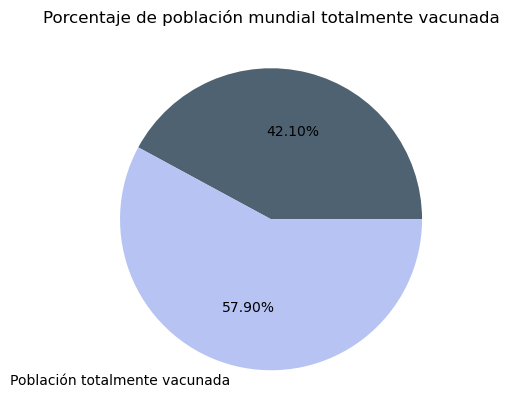

In [47]:
#Grafico de poblacion mundial totalmente vacunada

plt.figure(figsize=(10,5),dpi=100)
colors = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897']
plt.pie([world_population - total_completely_vaccinated, total_completely_vaccinated], autopct='%.2F%%', labels=['','Población totalmente vacunada'], colors = colors)
plt.title('Porcentaje de población mundial totalmente vacunada')
plt.show()

Podemos ver que en el mundo el 57.9% de la población se encuentra totalmente vacunada.

In [38]:
vaccinated_per_country = df.groupby(["country"])["people_vaccinated"].max()
total_vaccinated = sum(vaccinated_per_country)

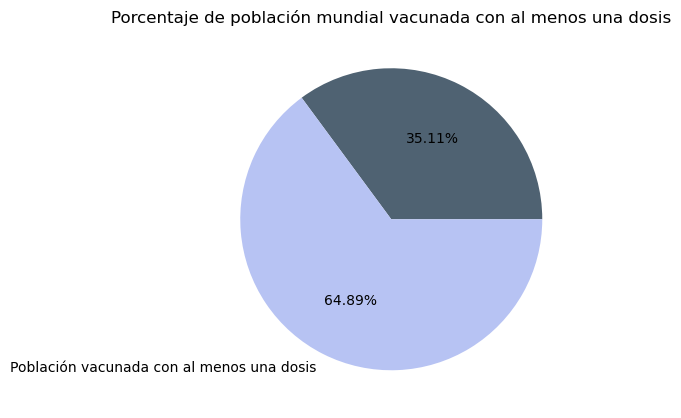

In [46]:
plt.figure(figsize=(10,5),dpi=100)
colors = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897']
plt.pie([world_population - total_vaccinated, total_vaccinated], autopct='%.2F%%', labels=['','Población vacunada con al menos una dosis'], colors = colors)
plt.title('Porcentaje de población mundial vacunada con al menos una dosis')
plt.show()

En este gráfico podemos ver que el porcentaje de personas con al menos una dosis es levemente superior, de un 64.89%.  
  
Veamos que sucede para el caso de Uruguay.

In [42]:
population_uy = 0
for i in range(0,len(df)):
    if df['country'][i] == 'Uruguay':
        population_uy = df['population'][i]

fully_vaccinated_uy = 0
for i in range(0,len(df)):
    if df['country'][i] == 'Uruguay' and df['people_fully_vaccinated'][i]>= fully_vaccinated_uy:
        fully_vaccinated_uy = df['people_fully_vaccinated'][i]

vaccinated_uy = 0
for i in range(0,len(df)):
    if df['country'][i] == 'Uruguay' and df['people_vaccinated'][i]>= vaccinated_uy:
        vaccinated_uy = df['people_vaccinated'][i]

2972777.0

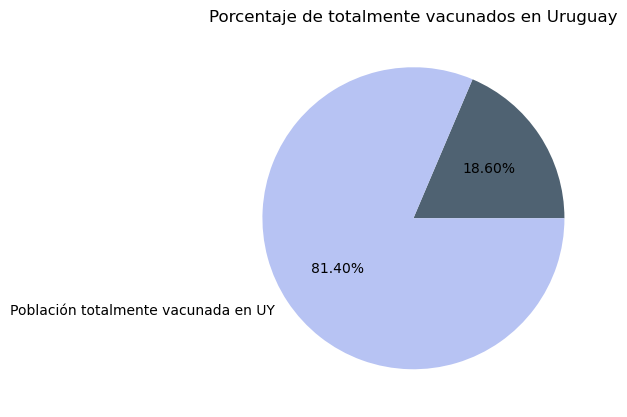

In [117]:
plt.figure(figsize=(10,5),dpi=100)
colors = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897']
plt.pie([population_uy - fully_vaccinated_uy, fully_vaccinated_uy], autopct='%.2F%%', labels=['','Población totalmente vacunada en UY'], colors = colors)
plt.title('Porcentaje de totalmente vacunados en Uruguay')
plt.show()

Podemos ver en el gráfico que el número de completamente vacunados en Uruguay es significativamente superior al del mundo. Esto nos posiciona bien en términos de vacunación contra el coronavirus.

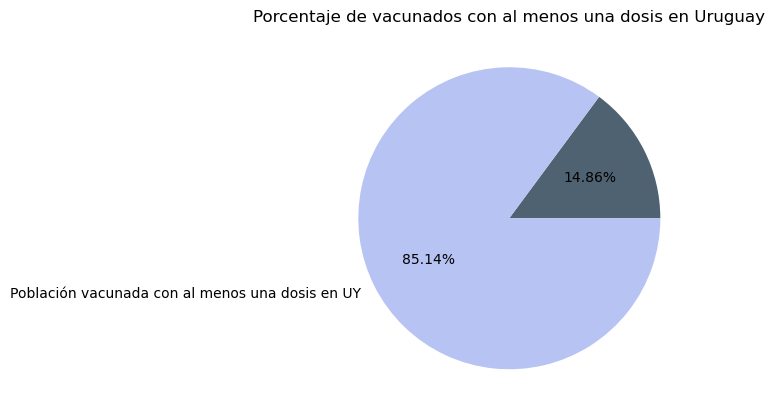

In [44]:
plt.figure(figsize=(10,5),dpi=100)
colors = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897']
plt.pie([population_uy - vaccinated_uy, vaccinated_uy], autopct='%.2F%%', labels=['','Población vacunada con al menos una dosis en UY'], colors = colors)
plt.title('Porcentaje de vacunados con al menos una dosis en Uruguay')
plt.show()

Al igual que para el caso del mundo, en Uruguay se observa un aumento levemente mayor si también se considera a la población vacunada con una sola dosis.

In [ ]:
Para poder avanzar con el análisis y ver tendencias, agruparemos los datos por país.

In [63]:
# Creamos una tabla con los datos por país

fully_vaccinated_vs_deaths = pd.merge(df.groupby(["country"])["people_fully_vaccinated"].max(), df.groupby(["country"])["New_deaths"].sum(), on='country')
fully_vaccinated_vs_deaths
vaccinated_vs_deaths = pd.merge(df.groupby(["country"])["people_vaccinated"].max(), fully_vaccinated_vs_deaths, on='country')
data_by_country = pd.merge(df.groupby(["country"])["population"].mean(), vaccinated_vs_deaths, on='country')
data_by_country


,population,people_vaccinated,people_fully_vaccinated,New_deaths
country,,,,
Afghanistan,40374668.0,5082824.0,4420127.0,794
Albania,2869700.0,1278902.0,1215199.0,657
Algeria,45061896.0,7461932.0,6110712.0,158
Andorra,77355.0,57817.0,53367.0,3
Angola,34566172.0,11235059.0,5993792.0,218
...,...,...,...,...
Wallis and Futuna,11094.0,6483.0,6457.0,2
Yemen,30882462.0,643501.0,404781.0,52
Zambia,19238117.0,2487149.0,1862614.0,1637


Algo que interesa conocer es qué país tuvo el mayor porcentaje de muertos. Se desprende de la tabla que se trata de Perú.

In [102]:
# Buscamos el país con más muertes sobre su población

death_ratio = []
for i in data_by_country.index:
    death_ratio.append(data_by_country['New_deaths'][i]/data_by_country['population'][i])

death_ratio

country_most_deaths = []
for country in countries:
    if data_by_country['New_deaths'][country]/data_by_country['population'][country] == max(death_ratio): 
        country_most_deaths.append(country)
        
country_most_deaths


['Peru']

Interesa también conocer qué países son los de mayor y menor vacunación.

In [121]:
vaccinated_ratio = []
for i in data_by_country.index:
    vaccinated_ratio.append(data_by_country['people_fully_vaccinated'][i]/data_by_country['population'][i])

country_most_vaccinated = []
country_less_vaccinated = []

for country in countries:
    if data_by_country['people_fully_vaccinated'][country]/data_by_country['population'][country] == max(vaccinated_ratio): 
        country_most_vaccinated.append(country)
    if data_by_country['people_fully_vaccinated'][country]/data_by_country['population'][country] == min(vaccinated_ratio): 
        country_less_vaccinated.append(country)
        
print(country_most_vaccinated)
print(country_less_vaccinated)

['Gibraltar']
['Burundi']


Tomaremos el caso de Uruguay para analizar el efecto de la vacunación en la tasa de mortalidad, ya que vimos que es un país con alto porcentaje de vacunados.

In [104]:
# Creo un dataframe solo con los datos de Uruguay

filtro = df['country'] == 'Uruguay'
df_uruguay = df[filtro]
df_uruguay.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,New_deaths,population,ratio
31830,Uruguay,URY,2021-03-29,577729.0,560468.0,17261.0,26,3491832.0,16.050829
31831,Uruguay,URY,2021-03-30,629982.0,598682.0,31300.0,14,3491832.0,17.145212
31832,Uruguay,URY,2021-03-31,687932.0,636264.0,51668.0,13,3491832.0,18.221495
31833,Uruguay,URY,2021-04-01,736035.0,675878.0,60157.0,25,3491832.0,19.355971
31834,Uruguay,URY,2021-04-02,785195.0,716321.0,68874.0,21,3491832.0,20.514189


Graficaremos la evolución de la vacunación y las muertes a lo largo del tiempo.

Text(0.5, 1.0, 'Total de vacunados completamente vs muertes - Uruguay')

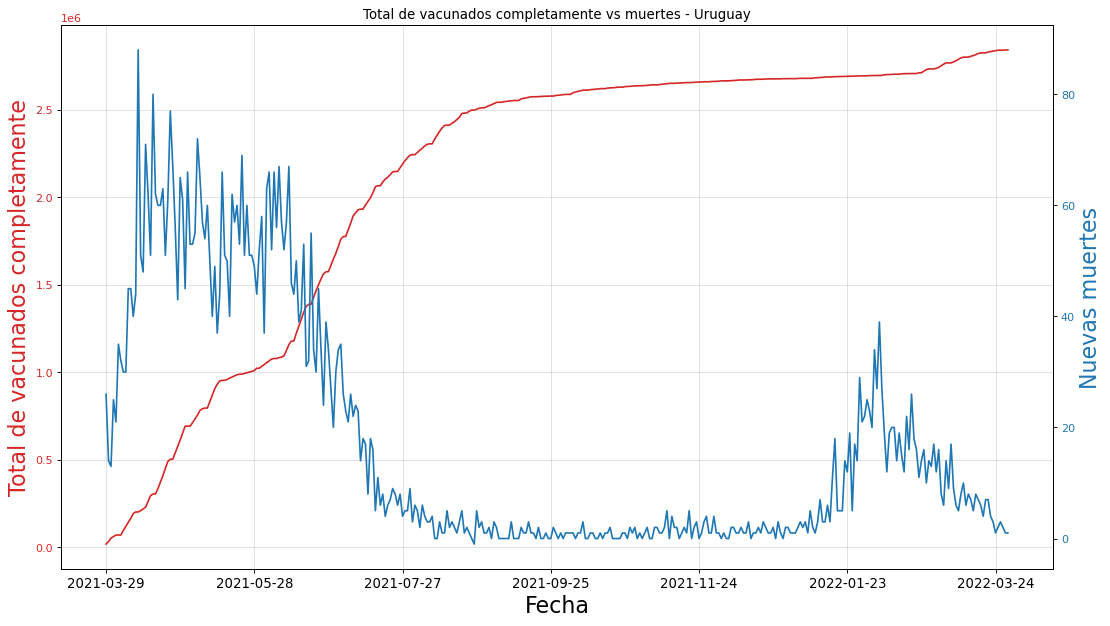

In [119]:
# Graficamos

fig, ax1 = plt.subplots(1,1,figsize=(16,9), dpi= 80)
ax1.plot(df_uruguay['date'],df_uruguay['people_fully_vaccinated'],color='tab:red')

ax2 = ax1.twinx()
ax2.plot(df_uruguay['date'],df_uruguay['New_deaths'],color='tab:blue')

ax1.set_xlabel('Fecha',fontsize=20)
ax1.tick_params(axis='x',rotation=0,labelsize=12)
ax1.set_ylabel('Total de vacunados completamente',color='tab:red',fontsize=20)
ax1.tick_params(axis='y',rotation=0,labelcolor='tab:red')
ax1.grid(alpha=0.4)

ax2.set_ylabel('Nuevas muertes',fontsize=20,color='tab:blue')
ax2.tick_params(axis='y',rotation=0,labelcolor='tab:blue')
ax2.set_xticks(np.arange(0,len(df_uruguay['date']),60))#
ax2.set_title('Total de vacunados completamente vs muertes - Uruguay')

En la grafica se puede ver representado en rojo el total de vacunados completamente mientras que en azul se aprecia la mortalidad (muertos por día).

Lo que nos muestra este analisis es precisamente como con el aumento porcentual de gente totalmente vacunada disminuye significativamente la mortalidad en Uruguay. Pudiendo deducir la importancia de las vacunas para poder controlar la situacion pandémica. 

Para contrastar, analizaremos la información de un país con poco porcentaje de vacunados. Tomaremos el caso de Nigeria.

In [122]:
# Creo dataframe con info de Nigeria

filtro2 = df['country'] == 'Nigeria'
df_nigeria = df[filtro2]
df_nigeria.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,New_deaths,population,ratio
22308,Nigeria,NGA,2021-05-25,1939737.0,1930922.0,8815.0,0,214507696.0,0.900164
22309,Nigeria,NGA,2021-05-26,1953870.0,1938611.0,15259.0,4,214507696.0,0.903749
22310,Nigeria,NGA,2021-05-27,1967435.0,1945273.0,22162.0,0,214507696.0,0.906855
22311,Nigeria,NGA,2021-05-28,1984242.0,1950298.0,33944.0,0,214507696.0,0.909197
22312,Nigeria,NGA,2021-05-29,1996914.0,1952694.0,44220.0,0,214507696.0,0.910314


Text(0.5, 1.0, 'Total de vacunados completamente vs muertes - Nigeria')

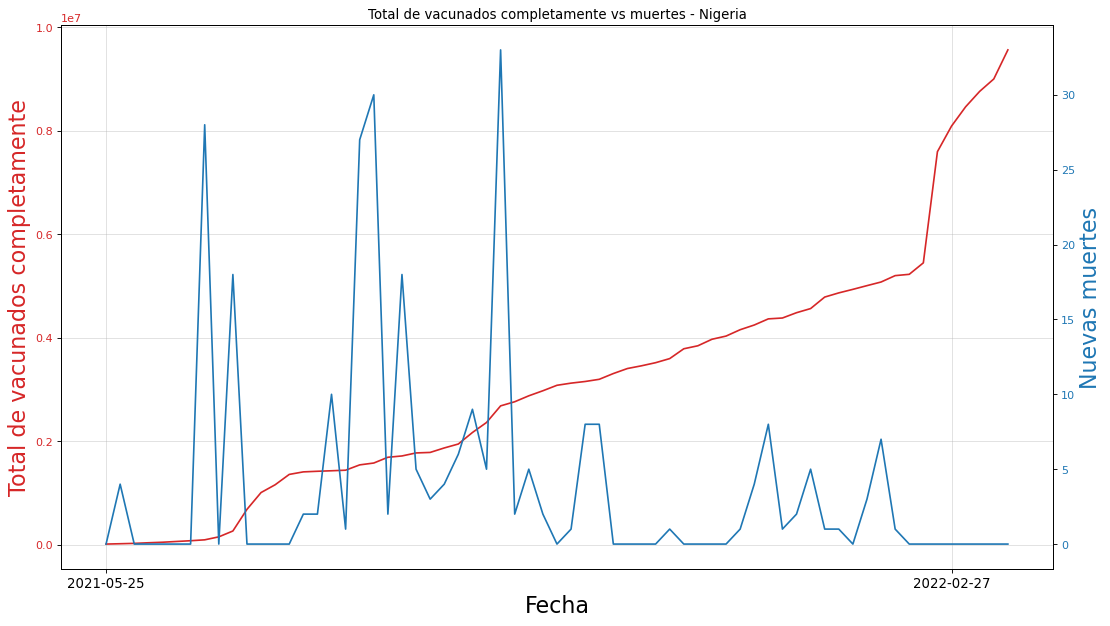

In [123]:
# Graficamos
fig, ax1 = plt.subplots(1,1,figsize=(16,9), dpi= 80)
ax1.plot(df_nigeria['date'],df_nigeria['people_fully_vaccinated'],color='tab:red')

ax2 = ax1.twinx()
ax2.plot(df_nigeria['date'],df_nigeria['New_deaths'],color='tab:blue')

ax1.set_xlabel('Fecha',fontsize=20)
ax1.tick_params(axis='x',rotation=0,labelsize=12)
ax1.set_ylabel('Total de vacunados completamente',color='tab:red',fontsize=20)
ax1.tick_params(axis='y',rotation=0,labelcolor='tab:red')
ax1.grid(alpha=0.4)

ax2.set_ylabel('Nuevas muertes',fontsize=20,color='tab:blue')
ax2.tick_params(axis='y',rotation=0,labelcolor='tab:blue')
ax2.set_xticks(np.arange(0,len(df_nigeria['date']),60))#
ax2.set_title('Total de vacunados completamente vs muertes - Nigeria')

En este caso, realizando un analisis de la situacion de Nigeria, un pais de escaso porcentaje de vacunacion se podria utilizar para confirmar nuevamente la conclusion de la grafica anterior. Donde el total de vacunados completamente no tiene una evolucion rapida si no que demora en aumentar y se ve reflejado en la mortalidad que no lograban disminuirla, una vez que la cantidad de vacunados completamente empieza a crecer se nota como empieza a disminuir la misma. 

## 6 - Conclusiones

De los gráficos observados anteriormente podemos extraer dos conclusiones importantes:
- La vacunación tiene un efecto importante en la disminución de la tasa de mortalidad
- Uruguay se encuentra bien preparado para hacerle frente a la pandemia, ya que se observan buenos resultados en comparación a la situación general mundial.